In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [3]:
train_df = pd.read_csv('./datasets/train_all.csv')
train_df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원),환율종가,금값종가,선행지수순환변동치
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,25,83.300000,18000,"1,175.45",76.81,99.6
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,26,83.300000,55200,"1,175.45",76.81,99.6
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,14,83.300000,36800,"1,175.45",76.81,99.6
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,6,83.300000,67600,"1,175.45",76.81,99.6
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,26,83.300000,30300,"1,175.45",76.81,99.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,4,103.933333,171000,"1,084.47",71.96,100.4
453166,성북구,2020-12-31,59.98,2,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,19,103.933333,47000,"1,084.47",71.96,100.4
453167,용산구,2020-12-31,84.21,7,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,9,103.933333,175000,"1,084.47",71.96,100.4
453168,은평구,2020-12-31,84.69,1,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,16,103.933333,59700,"1,084.47",71.96,100.4


In [4]:
# 환율 종가 float로 타입 변경
train_df['환율종가'] = train_df['환율종가'].str.replace(',', '')  # 쉼표(,) 제거
train_df['환율종가'] = train_df['환율종가'].astype('float')
train_df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원),환율종가,금값종가,선행지수순환변동치
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,25,83.300000,18000,1175.45,76.81,99.6
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,26,83.300000,55200,1175.45,76.81,99.6
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,14,83.300000,36800,1175.45,76.81,99.6
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,6,83.300000,67600,1175.45,76.81,99.6
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,2.10,1.67,1.49,1.5,26,83.300000,30300,1175.45,76.81,99.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,4,103.933333,171000,1084.47,71.96,100.4
453166,성북구,2020-12-31,59.98,2,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,19,103.933333,47000,1084.47,71.96,100.4
453167,용산구,2020-12-31,84.21,7,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,9,103.933333,175000,1084.47,71.96,100.4
453168,은평구,2020-12-31,84.69,1,2873.469971,0.09,49.8,30495,0.97,1.32,...,2.21,0.66,0.51,0.5,16,103.933333,59700,1084.47,71.96,100.4


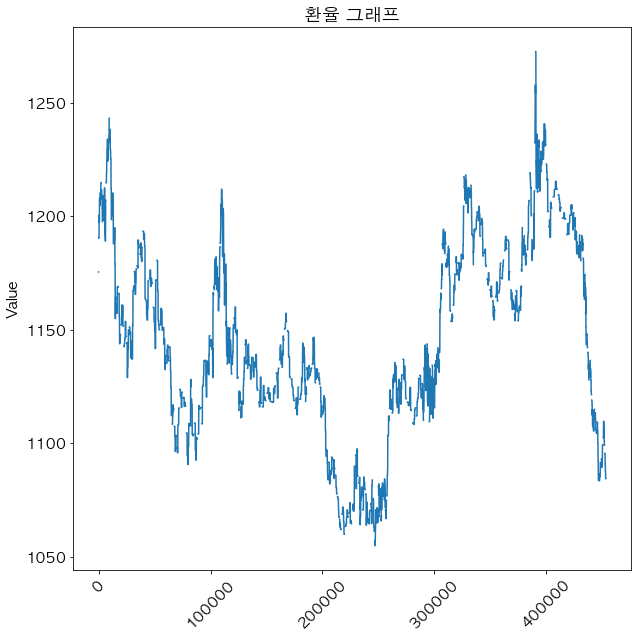

In [6]:
# 환율종가 그래프로 나타내기
plt.figure(figsize=(10, 10))
plt.plot(train_df['환율종가'])
plt.ylabel('Value')
plt.title('환율 그래프')
plt.xticks(rotation=45)
plt.show()

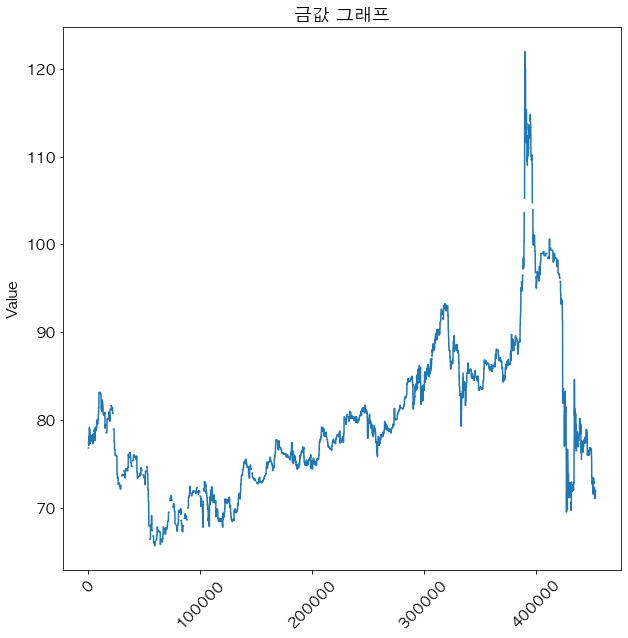

In [7]:
# 금값종가 그래프로 나타내기
plt.figure(figsize=(10, 10))
plt.plot(train_df['금값종가'])
plt.ylabel('Value')
plt.title('금값 그래프')
plt.xticks(rotation=45)
plt.show()

In [8]:
train_df.isna().sum()

자치구                       0
계약일                       0
건물면적(㎡)                   0
층                         0
KOSPI종가                   0
Fed기준금리                   0
국제유가(Dubai)($/배럴)         0
부동산거래량                    0
국고채3년(평균)                 0
국고채5년(평균)                 0
국고채10년(평균)                0
회사채3년(평균)                 0
CD91물(평균)                 0
콜금리(1일물,평균)               0
BOK기준금리                   0
건물연식                      0
GDP대비가계부채비율               0
물건금액(만원)                  0
환율종가                 123029
금값종가                 108505
선행지수순환변동치                 0
dtype: int64

In [9]:
test_df = pd.read_csv('./datasets/test_all.csv')
test_df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,물건금액(만원),환율종가,금값종가,선행지수순환변동치
0,양천구,2021-01-01,55.93,6,2873.469971,0.09,54.8,20938,0.98,1.32,...,2.14,0.68,0.49,0.50,19,104.4,52000,"1,084.73",71.96,100.7
1,양천구,2021-01-01,49.99,7,2873.469971,0.09,54.8,20938,0.98,1.32,...,2.14,0.68,0.49,0.50,21,104.4,52800,"1,084.73",71.96,100.7
2,강동구,2021-01-01,13.02,15,2873.469971,0.09,54.8,20938,0.98,1.32,...,2.14,0.68,0.49,0.50,1,104.4,24000,"1,084.73",71.96,100.7
3,서초구,2021-01-01,59.93,25,2873.469971,0.09,54.8,20938,0.98,1.32,...,2.14,0.68,0.49,0.50,8,104.4,120000,"1,084.73",71.96,100.7
4,강동구,2021-01-01,13.02,7,2873.469971,0.09,54.8,20938,0.98,1.32,...,2.14,0.68,0.49,0.50,1,104.4,23000,"1,084.73",71.96,100.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82922,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.63,3.59,...,5.30,4.02,3.24,3.25,18,105.0,250000,NaN,NaN,99.1
82923,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.63,3.59,...,5.30,4.02,3.24,3.25,34,105.0,138000,NaN,NaN,99.1
82924,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.63,3.59,...,5.30,4.02,3.24,3.25,14,105.0,172000,NaN,NaN,99.1
82925,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.63,3.59,...,5.30,4.02,3.24,3.25,26,105.0,37000,NaN,NaN,99.1


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82927 entries, 0 to 82926
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   자치구                82927 non-null  object 
 1   계약일                82927 non-null  object 
 2   건물면적(㎡)            82927 non-null  float64
 3   층                  82927 non-null  int64  
 4   KOSPI종가            82927 non-null  float64
 5   Fed기준금리            82927 non-null  float64
 6   국제유가(Dubai)($/배럴)  82927 non-null  float64
 7   부동산거래량             82927 non-null  int64  
 8   국고채3년(평균)          82927 non-null  float64
 9   국고채5년(평균)          82927 non-null  float64
 10  국고채10년(평균)         82927 non-null  float64
 11  회사채3년(평균)          82927 non-null  float64
 12  CD91물(평균)          82927 non-null  float64
 13  콜금리(1일물,평균)        82927 non-null  float64
 14  BOK기준금리            82927 non-null  float64
 15  건물연식               82927 non-null  int64  
 16  GDP대비가계부채비율        829

### 환율종가, 금값종가 직전 값으로 대체

In [11]:
# train 환율 종가 직전 값으로 대체
train_df['환율종가'] = train_df['환율종가'].fillna(method='ffill')
train_df['환율종가'].isna().sum()

0

In [12]:
# train 금값종가 직전 값으로 대체
train_df['금값종가'] = train_df['금값종가'].fillna(method='ffill')
train_df['금값종가'].isna().sum()

0

In [13]:
# test 환율 종가 직전 값으로 대체
test_df['환율종가'] = test_df['환율종가'].fillna(method='ffill')
test_df['환율종가'].isna().sum()

0

In [14]:
# test 금값종가 직전 값으로 대체
test_df['금값종가'] = test_df['금값종가'].fillna(method='ffill')
test_df['금값종가'].isna().sum()

0

In [15]:
# EPU 지수 불러오기
a = pd.read_excel('./datasets/EPU지수.xlsx')
a

,Year,Month,South Korea,Korea Text,United States of America,US Text,GEPU Current,GEPU PPP,Australia,Brazil,...,Ireland,Italy,Japan,Netherlands,Russia,Spain,Singapore,United Kingdom,Sweden,Mexico
0,2023,5,149.445007,NaN,209.579999,NaN,NaN,NaN,148.655642,219.359301,...,NaN,115.487788,NaN,NaN,245.093522,134.037507,NaN,249.682639,NaN,40.333989
1,2023,4,187.613874,NaN,171.702320,NaN,NaN,NaN,194.659277,204.029156,...,167.837687,156.728421,145.103680,NaN,650.532318,84.988835,NaN,218.572076,NaN,52.742372
2,2023,3,215.014123,NaN,200.489936,NaN,318.953148,331.080259,190.028779,232.253189,...,307.767253,128.974552,128.734917,86.737223,356.250565,170.694116,324.699308,297.875730,113.957573,69.082777
3,2023,2,200.620753,NaN,152.967281,NaN,249.168683,260.777120,206.173517,194.122068,...,137.395739,117.908498,117.291775,83.831200,264.409910,110.741180,256.037908,267.984711,98.618662,49.850731
4,2023,1,175.305956,NaN,161.427113,NaN,251.893250,262.134357,115.358944,255.691584,...,269.562336,100.374074,95.748561,75.428737,392.549788,159.705457,250.164602,267.366246,129.144757,120.565407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2013,6,99.688691,NaN,126.625869,NaN,120.419787,118.332416,117.867590,131.464069,...,178.046077,134.501946,111.900785,202.514539,192.287864,112.615114,118.718847,216.774738,95.365134,45.018868
120,2013,5,65.847975,NaN,109.028043,NaN,106.458667,104.980142,161.500368,145.158243,...,167.809341,130.024795,93.618394,143.621645,150.058596,75.458638,104.256332,162.968723,97.909188,27.581242
121,2013,4,85.811232,NaN,135.440592,NaN,134.600027,135.814884,106.788631,130.496775,...,106.577590,199.696563,95.989319,212.294403,167.341833,124.013748,133.380778,240.477416,101.092369,24.387869
122,2013,3,79.811448,NaN,146.115862,NaN,141.663545,139.304095,81.992574,205.754503,...,100.495123,241.018206,123.647108,158.423268,230.156425,189.022566,126.501986,274.719020,97.004814,30.591608


In [16]:
# 필요한 년도만 추출
a = a[a['Year'] >= 2016]

In [17]:
# year와 month 컬럼을 합쳐서 datetime 타입으로 변경
a['월'] = pd.to_datetime(a['Year'].astype(str) + '-' + a['Month'].astype(str))

In [18]:
# 필요한 컬럼만 추출
a = a[['월', 'South Korea']]

In [19]:
# 컬럼 이름 변경
a.columns = ['월', 'EPU지수']

In [20]:
# train 시계열 변경
train_df['계약일'] = pd.to_datetime(train_df['계약일'])

In [21]:
# test 시계열 변경
test_df['계약일'] = pd.to_datetime(test_df['계약일'])

In [22]:
# 월별 데이터이므로 원본 데이터와 선행지수순환변동치 데이터의 월컬럼 만들기
train_df['월'] = train_df['계약일'].dt.to_period('M')
test_df['월'] = test_df['계약일'].dt.to_period('M')
a['월'] = a['월'].dt.to_period('M')

In [23]:
# 데이터 프레임 합치기
train_df1 = pd.merge(train_df, a, on='월', how='left')

In [24]:
# 데이터 프레임 합치기
test_df1 = pd.merge(test_df, a, on='월', how='left')

In [25]:
# 부동산 소비 심리지수 불러오기
b = pd.read_csv('./datasets/부동산 소비심리지수.csv', encoding='euc-kr')
b

,시도별(1),시도별(2),시점,데이터
0,수도권,서울특별시,2016.01,117.6
1,수도권,서울특별시,2016.02,120.1
2,수도권,서울특별시,2016.03,119.2
3,수도권,서울특별시,2016.04,123.9
4,수도권,서울특별시,2016.05,126.4
...,...,...,...,...
79,수도권,서울특별시,2022.08,88.3
80,수도권,서울특별시,2022.09,88.5
81,수도권,서울특별시,2022.10,78.7
82,수도권,서울특별시,2022.11,74.3


In [26]:
# 필요 없는 컬럼 삭제
b = b.iloc[:, 2:]

In [27]:
# 컬럼 이름 변경
b.columns = ['월', '부동산소비심리지수']

In [28]:
b['월'].astype('float')

0     2016.01
1     2016.02
2     2016.03
3     2016.04
4     2016.05
       ...   
79    2022.08
80    2022.09
81    2022.10
82    2022.11
83    2022.12
Name: 월, Length: 84, dtype: float64

In [29]:
# 오류나서 int -> object -> datetime 변경
b['월'] = b['월'].astype(str)

In [30]:
# 문자형으로 변경하면 10월이 1월로 변경되는 오류 발견
for i, value in enumerate(b['월']):
    if len(value) == 6:
        value += '0'
        b.loc[i, '월'] = value

In [31]:
b['월'] = pd.to_datetime(b['월'], format='%Y.%m')

In [32]:
b

,월,부동산소비심리지수
0,2016-01-01,117.6
1,2016-02-01,120.1
2,2016-03-01,119.2
3,2016-04-01,123.9
4,2016-05-01,126.4
...,...,...
79,2022-08-01,88.3
80,2022-09-01,88.5
81,2022-10-01,78.7
82,2022-11-01,74.3


In [33]:
# 월만 추출
b['월'] = b['월'].dt.to_period('M')

In [34]:
# 데이터 프레임 합치기
train_df2 = pd.merge(train_df1, b, on='월', how='left')

In [35]:
# 데이터 프레임 합치기
test_df2 = pd.merge(test_df1, b, on='월', how='left')

In [36]:
# 월 컬럼 삭제
train_df2.drop('월', axis = 1, inplace = True)

In [37]:
# 월 컬럼 삭제
test_df2.drop('월', axis = 1, inplace = True)

In [38]:
# '물건금액(만원)' 컬럼을 마지막으로 이동시키기
cols = train_df2.columns.tolist()
cols.remove('물건금액(만원)')
cols.append('물건금액(만원)')
train_df2 = train_df2[cols]
train_df2

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU지수,부동산소비심리지수,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.49,1.5,25,83.300000,1175.45,76.81,99.6,177.148845,117.6,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.49,1.5,26,83.300000,1175.45,76.81,99.6,177.148845,117.6,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.49,1.5,14,83.300000,1175.45,76.81,99.6,177.148845,117.6,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.49,1.5,6,83.300000,1175.45,76.81,99.6,177.148845,117.6,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.63,1.77,...,1.49,1.5,26,83.300000,1175.45,76.81,99.6,177.148845,117.6,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,성동구,2020-12-31,84.30,3,2873.469971,0.09,49.8,30495,0.97,1.32,...,0.51,0.5,4,103.933333,1084.47,71.96,100.4,107.509687,130.8,171000
453166,성북구,2020-12-31,59.98,2,2873.469971,0.09,49.8,30495,0.97,1.32,...,0.51,0.5,19,103.933333,1084.47,71.96,100.4,107.509687,130.8,47000
453167,용산구,2020-12-31,84.21,7,2873.469971,0.09,49.8,30495,0.97,1.32,...,0.51,0.5,9,103.933333,1084.47,71.96,100.4,107.509687,130.8,175000
453168,은평구,2020-12-31,84.69,1,2873.469971,0.09,49.8,30495,0.97,1.32,...,0.51,0.5,16,103.933333,1084.47,71.96,100.4,107.509687,130.8,59700


In [39]:
# '물건금액(만원)' 컬럼을 마지막으로 이동시키기
cols = test_df2.columns.tolist()
cols.remove('물건금액(만원)')
cols.append('물건금액(만원)')
test_df2 = test_df2[cols]
test_df2

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),...,"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU지수,부동산소비심리지수,물건금액(만원)
0,양천구,2021-01-01,55.93,6,2873.469971,0.09,54.8,20938,0.98,1.32,...,0.49,0.50,19,104.4,"1,084.73",71.96,100.7,128.916716,129.1,52000
1,양천구,2021-01-01,49.99,7,2873.469971,0.09,54.8,20938,0.98,1.32,...,0.49,0.50,21,104.4,"1,084.73",71.96,100.7,128.916716,129.1,52800
2,강동구,2021-01-01,13.02,15,2873.469971,0.09,54.8,20938,0.98,1.32,...,0.49,0.50,1,104.4,"1,084.73",71.96,100.7,128.916716,129.1,24000
3,서초구,2021-01-01,59.93,25,2873.469971,0.09,54.8,20938,0.98,1.32,...,0.49,0.50,8,104.4,"1,084.73",71.96,100.7,128.916716,129.1,120000
4,강동구,2021-01-01,13.02,7,2873.469971,0.09,54.8,20938,0.98,1.32,...,0.49,0.50,1,104.4,"1,084.73",71.96,100.7,128.916716,129.1,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82922,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.63,3.59,...,3.24,3.25,18,105.0,"1,260.92",76.11,99.1,169.662386,76.0,250000
82923,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.63,3.59,...,3.24,3.25,34,105.0,"1,260.92",76.11,99.1,169.662386,76.0,138000
82924,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.63,3.59,...,3.24,3.25,14,105.0,"1,260.92",76.11,99.1,169.662386,76.0,172000
82925,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.63,3.59,...,3.24,3.25,26,105.0,"1,260.92",76.11,99.1,169.662386,76.0,37000


### 최종 데이터 프레임 합치기 완료

In [40]:
# 숫자형 데이터만 추출
train_df_num = train_df2.select_dtypes([np.number])

In [41]:
#스케일링 전 샤피로 테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in train_df_num.columns:
    a = stats.shapiro(train_df_num[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채3년(평균) 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
콜금리(1일물,평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU지수 0.0
부동산소비심리지수 0.0
물건금액(만원) 0.0


In [42]:
#스케일링 전 ks테스트
from scipy.stats import kstest
for i in train_df_num.columns:
    a = kstest(train_df_num[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채3년(평균) 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
콜금리(1일물,평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU지수 0.0
부동산소비심리지수 0.0
물건금액(만원) 0.0


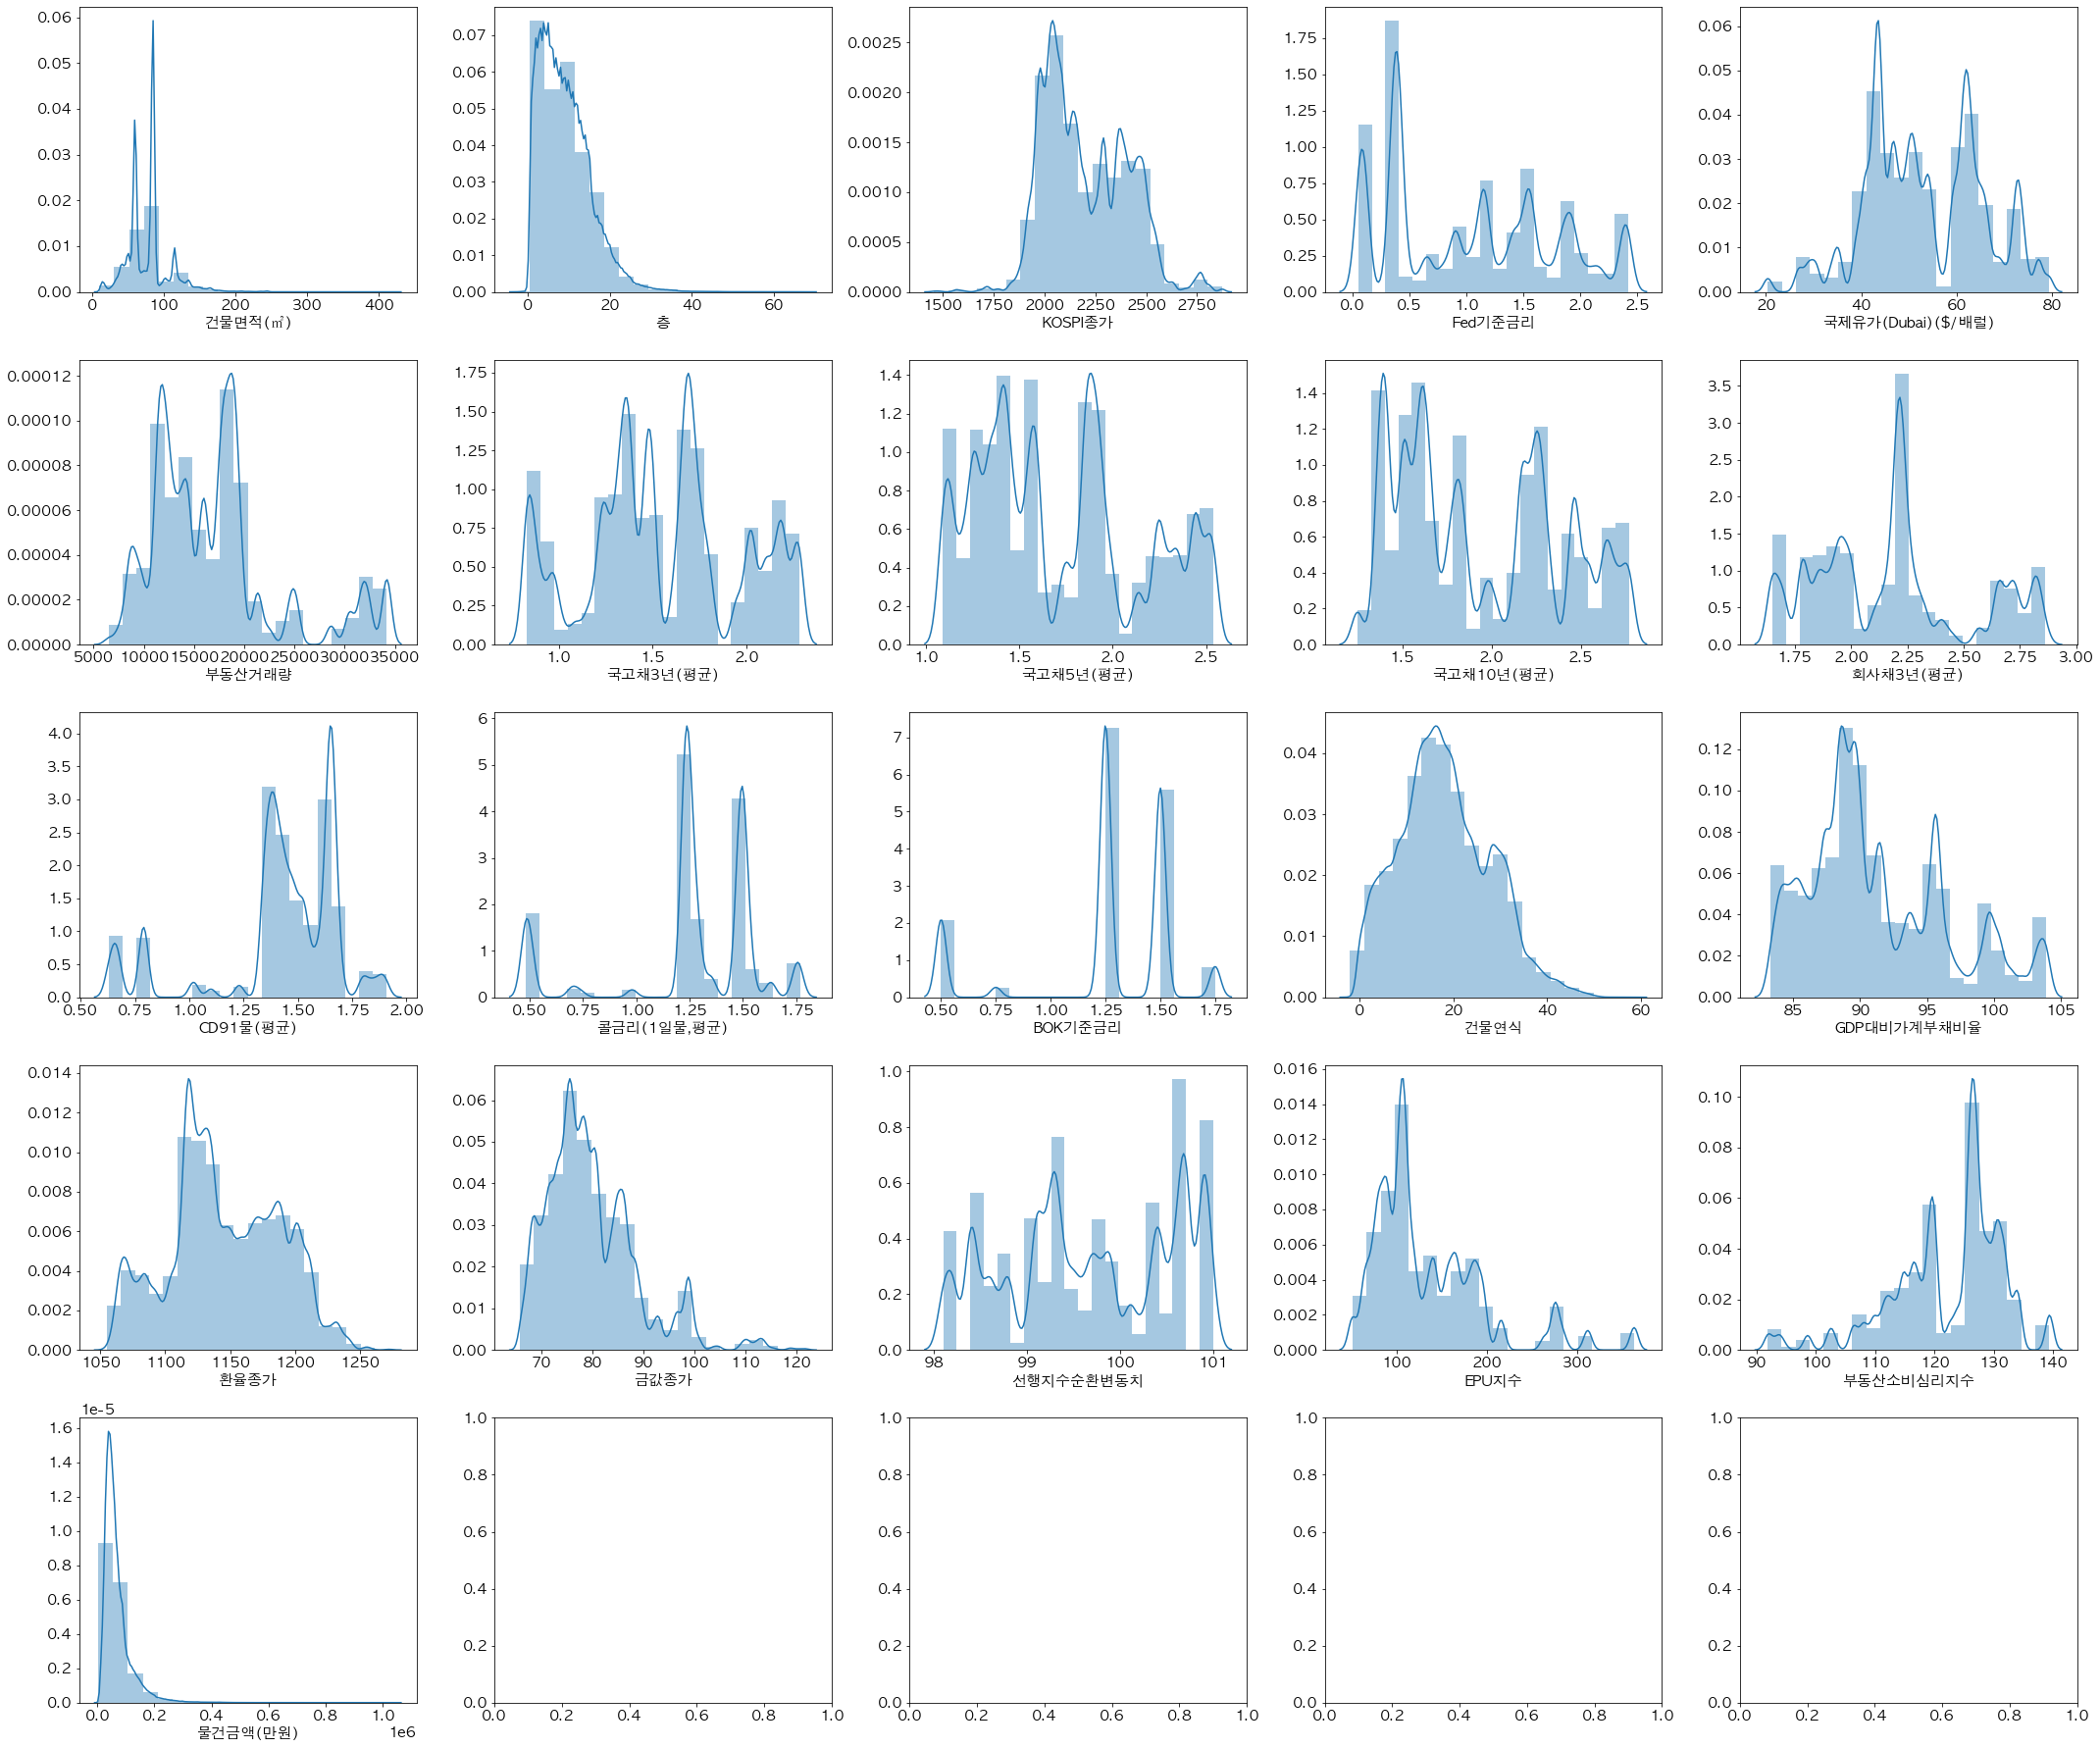

In [43]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(train_df_num.columns):
    sns.distplot(train_df_num[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_ylabel('')  # 세로축 레이블 제거

fig.tight_layout()
plt.show()

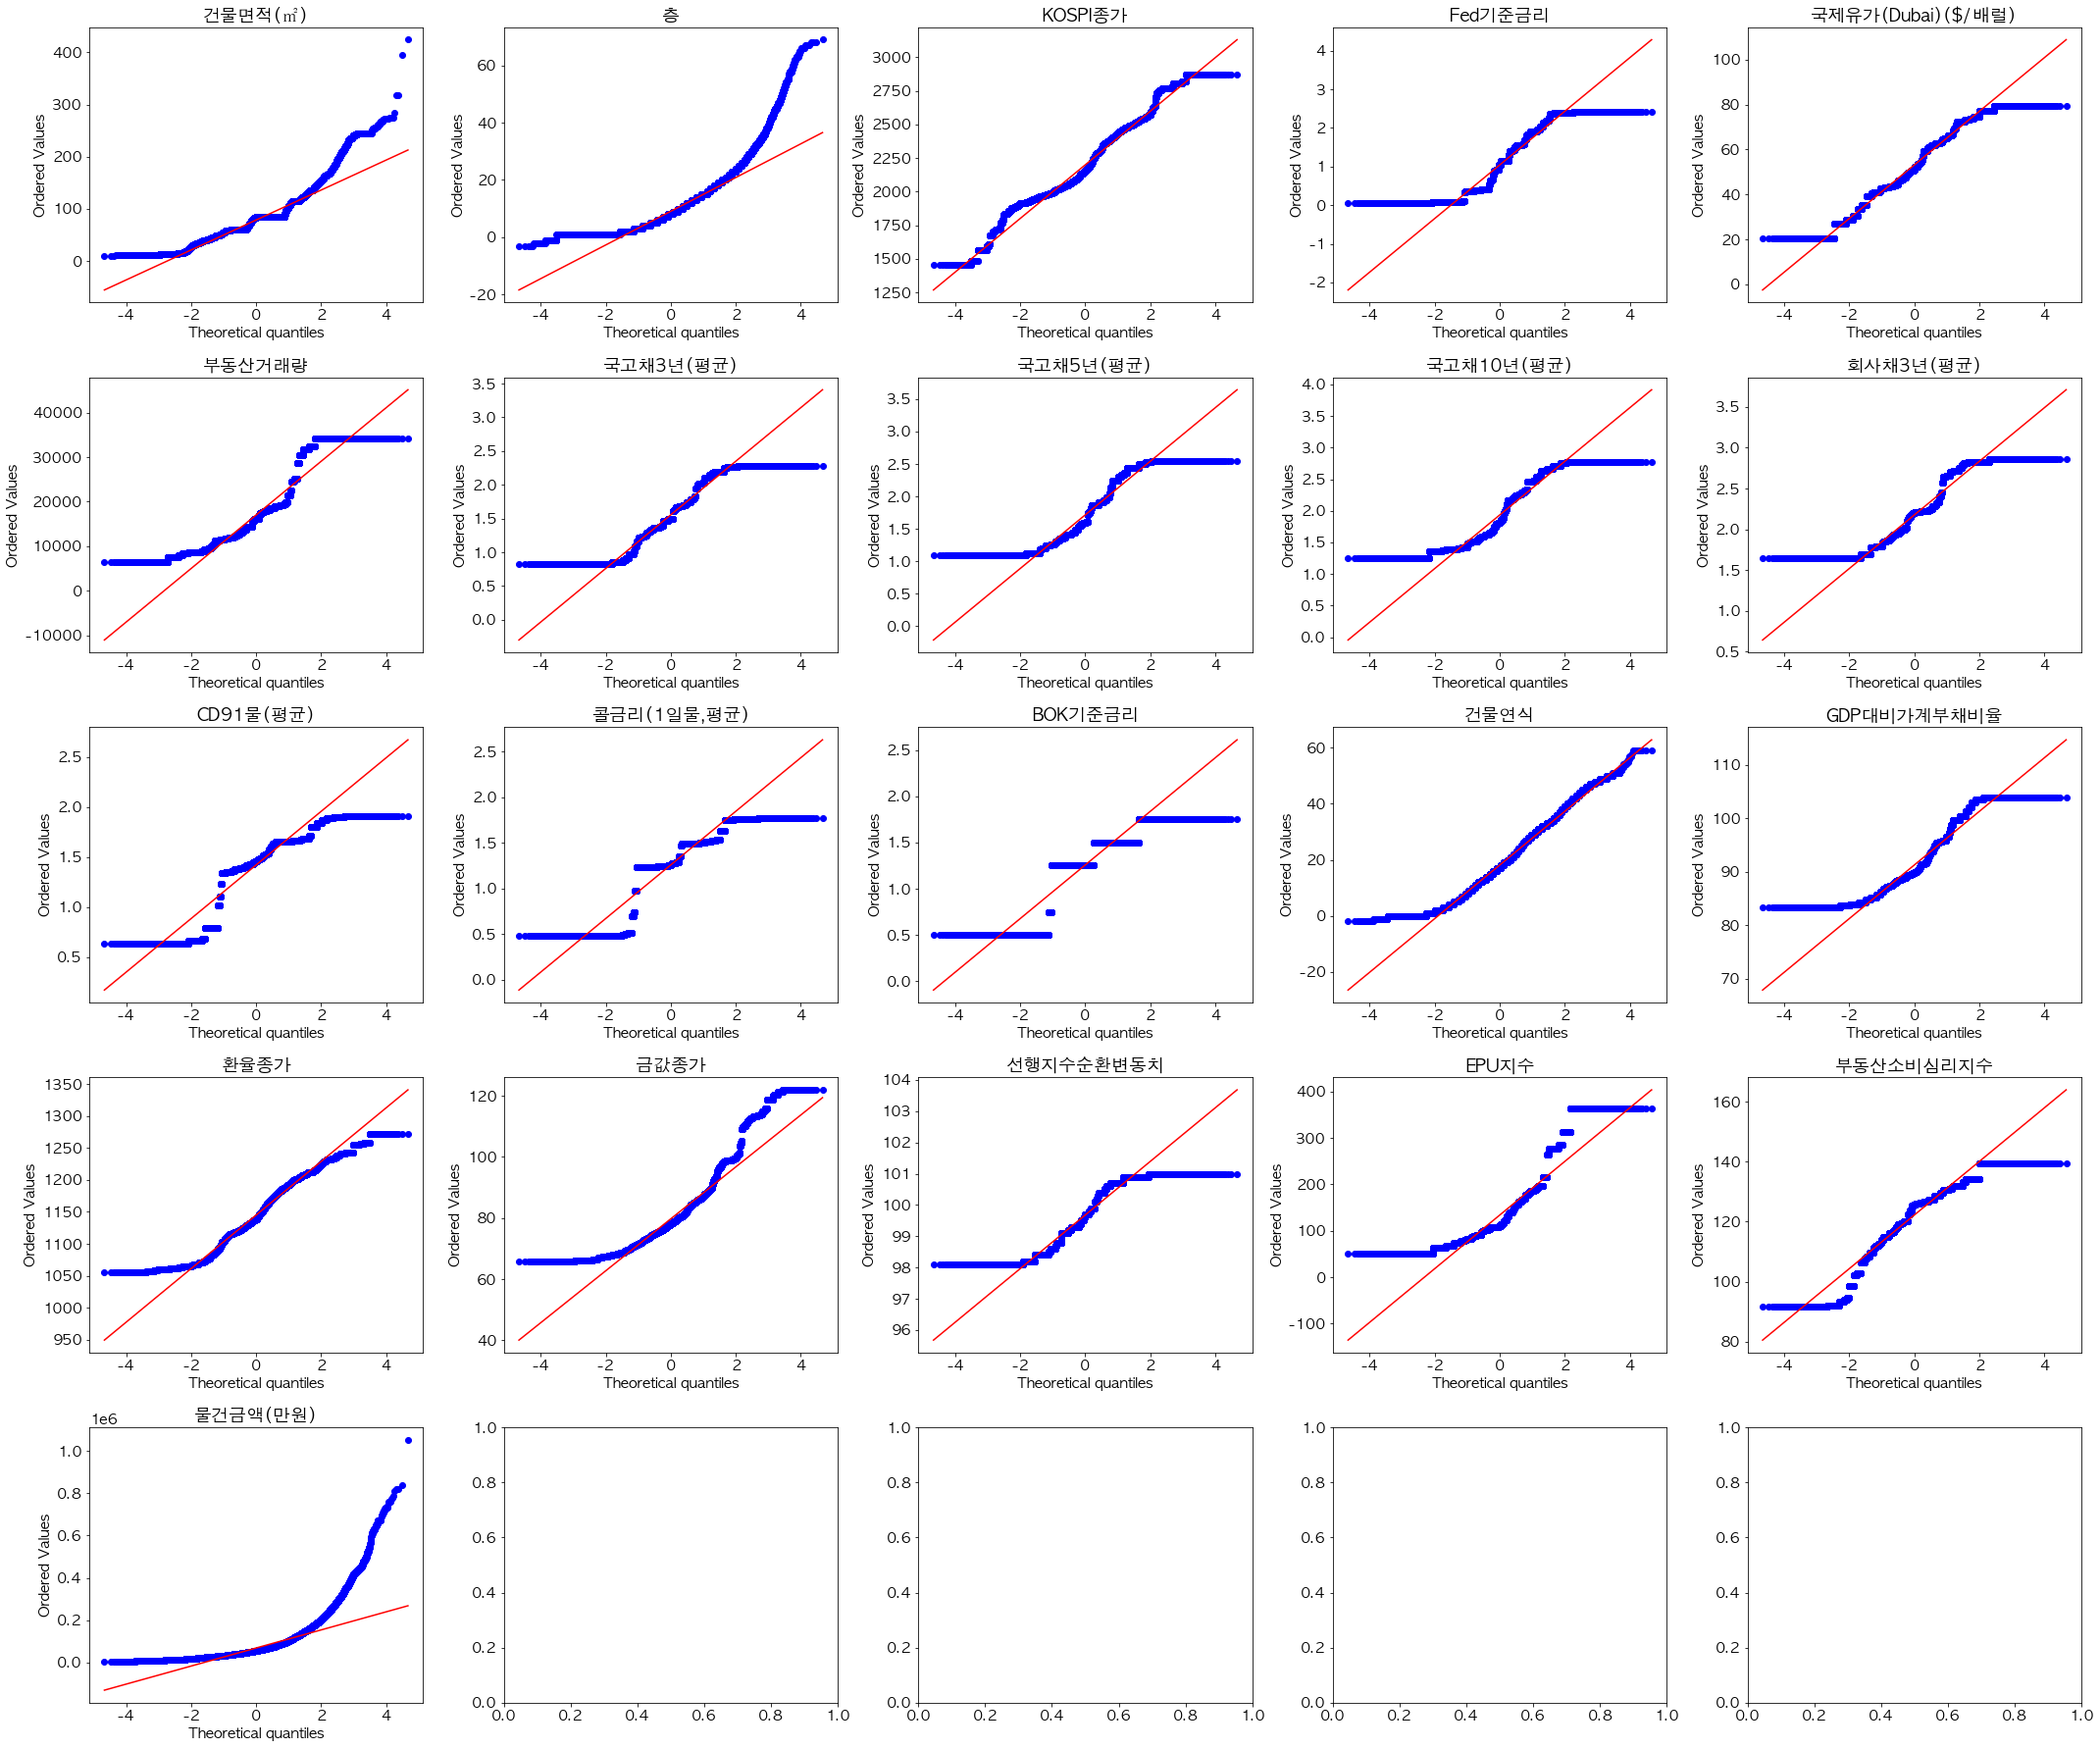

In [44]:
## qqplot
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(train_df_num.columns):
    stats.probplot(train_df_num[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

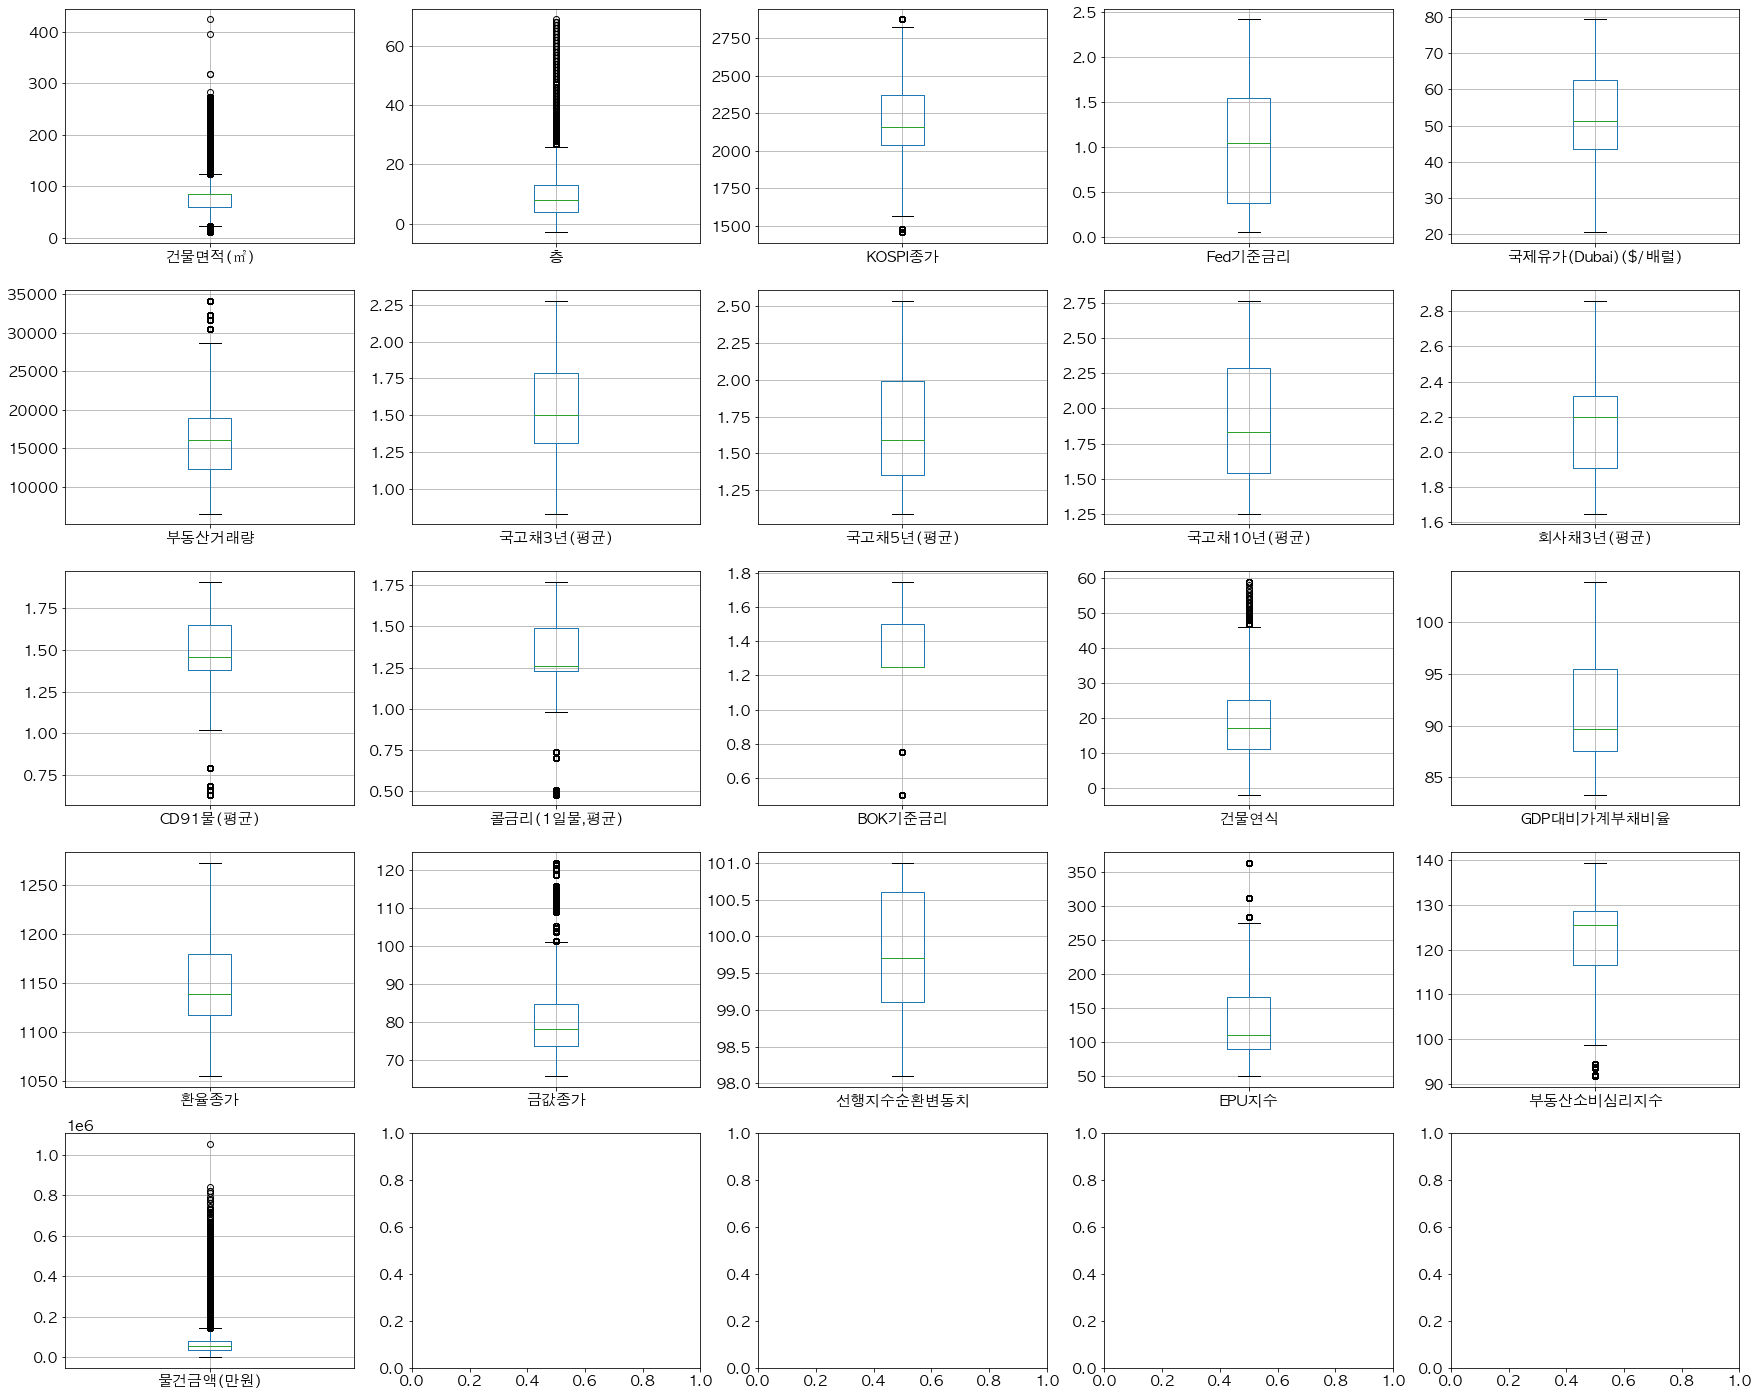

In [45]:
## boxplot
from matplotlib import rc 
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(train_df_num.columns):
    train_df_num.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

### 스탠다드 스케일링

In [46]:
X_train = train_df_num.drop('물건금액(만원)', axis = 1)
y_train = train_df['물건금액(만원)']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame (data = df_scaled, columns=X_train.columns)
X_train_scaled

,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채3년(평균),국고채5년(평균),국고채10년(평균),회사채3년(평균),CD91물(평균),"콜금리(1일물,평균)",BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU지수,부동산소비심리지수
0,-1.286449,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.186545,0.127698,0.212750,-0.227728,0.842816,0.703559,0.726133,0.708467,-1.544472,0.716146,-0.329434,-0.089932,0.695195,-0.503070
1,-0.111202,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.186545,0.127698,0.212750,-0.227728,0.842816,0.703559,0.726133,0.812190,-1.544472,0.716146,-0.329434,-0.089932,0.695195,-0.503070
2,0.202772,-0.990034,-1.172605,-0.977198,-2.178686,-1.116004,0.186545,0.127698,0.212750,-0.227728,0.842816,0.703559,0.726133,-0.432492,-1.544472,0.716146,-0.329434,-0.089932,0.695195,-0.503070
3,0.771643,-0.011677,-1.172605,-0.977198,-2.178686,-1.116004,0.186545,0.127698,0.212750,-0.227728,0.842816,0.703559,0.726133,-1.262280,-1.544472,0.716146,-0.329434,-0.089932,0.695195,-0.503070
4,0.194807,0.151383,-1.172605,-0.977198,-2.178686,-1.116004,0.186545,0.127698,0.212750,-0.227728,0.842816,0.703559,0.726133,0.812190,-1.544472,0.716146,-0.329434,-0.089932,0.695195,-0.503070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453165,0.185182,-0.990034,3.312522,-1.323442,-0.278985,2.099031,-1.441720,-0.923982,-0.580379,0.096251,-2.578275,-2.268244,-2.267644,-1.469727,2.440423,-1.433725,-0.877074,0.811921,-0.428077,0.924261
453166,-0.621991,-1.153094,3.312522,-1.323442,-0.278985,2.099031,-1.441720,-0.923982,-0.580379,0.096251,-2.578275,-2.268244,-2.267644,0.086126,2.440423,-1.433725,-0.877074,0.811921,-0.428077,0.924261
453167,0.182195,-0.337796,3.312522,-1.323442,-0.278985,2.099031,-1.441720,-0.923982,-0.580379,0.096251,-2.578275,-2.268244,-2.267644,-0.951109,2.440423,-1.433725,-0.877074,0.811921,-0.428077,0.924261
453168,0.198126,-1.316153,3.312522,-1.323442,-0.278985,2.099031,-1.441720,-0.923982,-0.580379,0.096251,-2.578275,-2.268244,-2.267644,-0.225045,2.440423,-1.433725,-0.877074,0.811921,-0.428077,0.924261


In [48]:
#스케일링 후 정규성테스트
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for i in X_train_scaled.columns:
    a = stats.shapiro(X_train_scaled[i])
    p = a.pvalue   
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채3년(평균) 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
콜금리(1일물,평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU지수 0.0
부동산소비심리지수 0.0


In [49]:
#스케일링 후 ks테스트
for i in X_train_scaled.columns:
    a = kstest(X_train_scaled[i],'norm')
    p = a.pvalue
    print(i,p)

건물면적(㎡) 0.0
층 0.0
KOSPI종가 0.0
Fed기준금리 0.0
국제유가(Dubai)($/배럴) 0.0
부동산거래량 0.0
국고채3년(평균) 0.0
국고채5년(평균) 0.0
국고채10년(평균) 0.0
회사채3년(평균) 0.0
CD91물(평균) 0.0
콜금리(1일물,평균) 0.0
BOK기준금리 0.0
건물연식 0.0
GDP대비가계부채비율 0.0
환율종가 0.0
금값종가 0.0
선행지수순환변동치 0.0
EPU지수 0.0
부동산소비심리지수 0.0


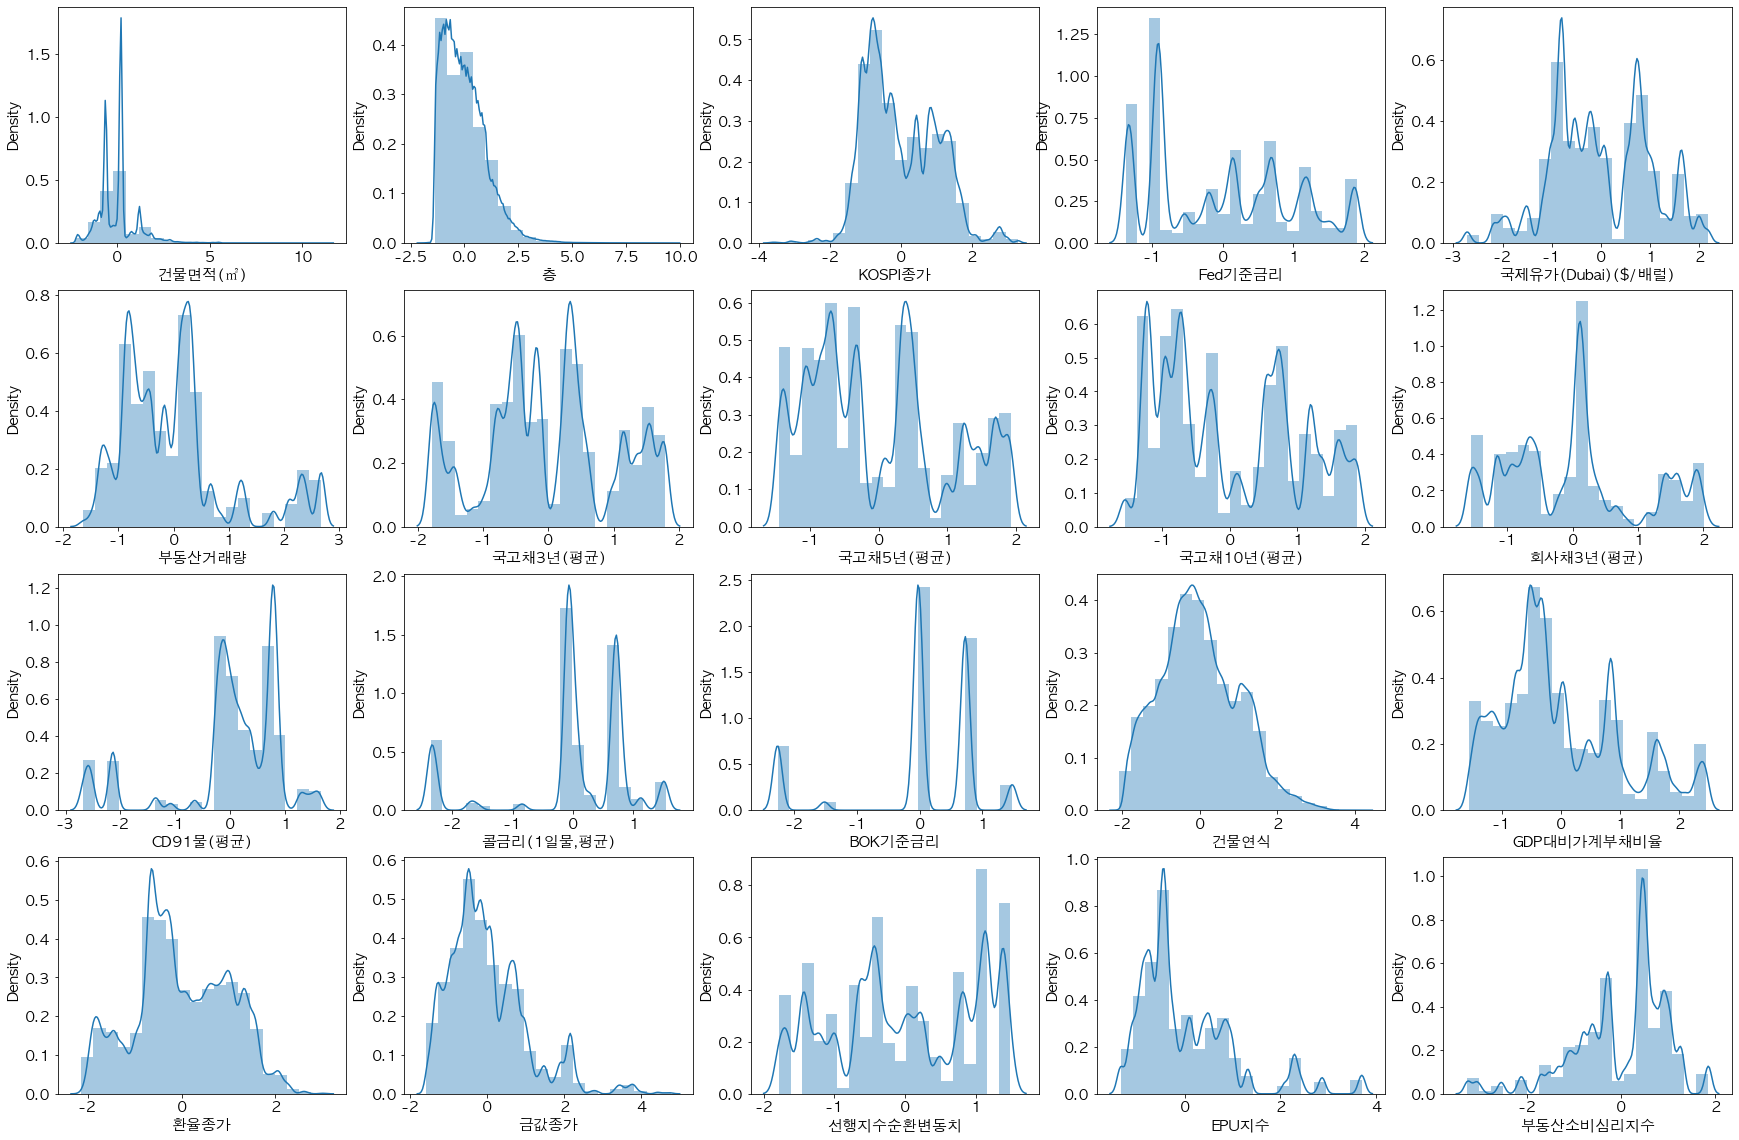

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

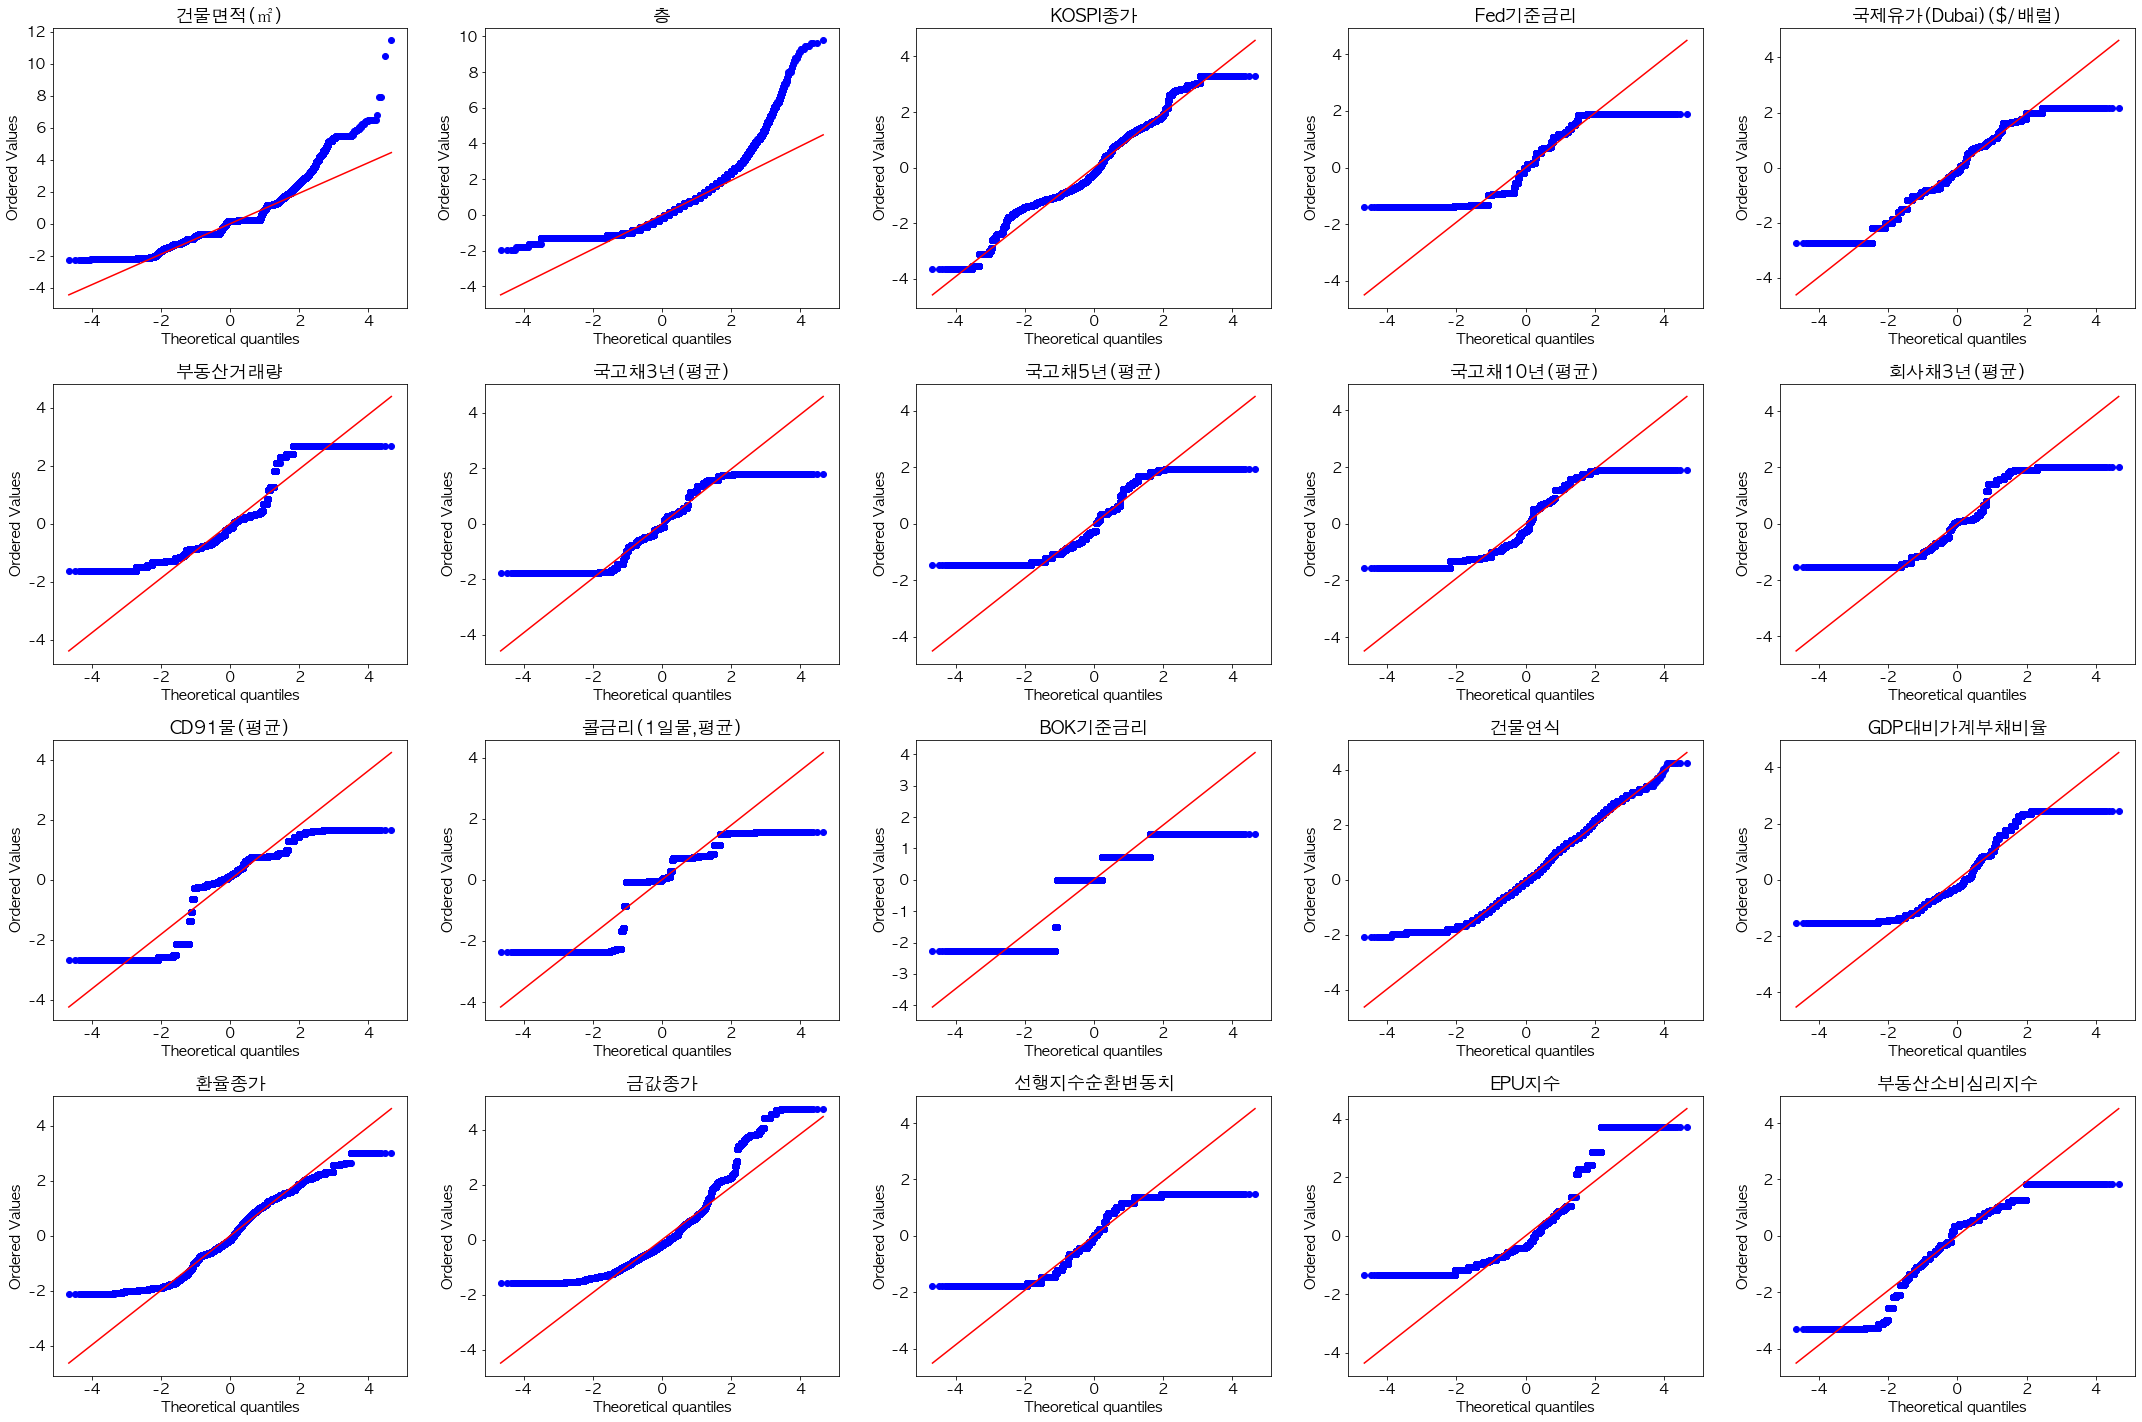

In [51]:
## qq plot
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    stats.probplot(X_train_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

- 보통은 다중공선성을 먼저 평가하고, VIF가 10 이상인 변수들을 제거한 후, 남은 변수들을 대상으로 OLS 분석을 수행하여 p-value를 평가하여 유의미한 변수를 선택하는 방식을 사용합니다. 이렇게 함으로써 다중공선성을 고려하면서도 유의한 변수들을 선택할 수 있습니다.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                         for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

     VIF_Factor            Feature
0      1.019285            건물면적(㎡)
1      1.051750                  층
2     11.486123            KOSPI종가
3     21.952980            Fed기준금리
4     10.971283  국제유가(Dubai)($/배럴)
5      3.888426             부동산거래량
6   1043.585034          국고채3년(평균)
7   2187.929450          국고채5년(평균)
8    395.192785         국고채10년(평균)
9     51.267409          회사채3년(평균)
10    90.605435          CD91물(평균)
11   121.621859        콜금리(1일물,평균)
12    63.884491            BOK기준금리
13     1.048843               건물연식
14    24.810399        GDP대비가계부채비율
15     5.590022               환율종가
16     8.162412               금값종가
17    29.402455          선행지수순환변동치
18     2.659088              EPU지수
19     2.520845          부동산소비심리지수


In [53]:
# 국고채5년(평균) 컬럼 삭제
X_train_1 = X_train_scaled.drop('국고채5년(평균)', axis = 1)

In [54]:
def feature_engineering_XbyVIF(X_train_1):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_1.values,i)
                         for i in range(X_train_1.shape[1])]
    vif["Feature"] = X_train_1.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_1)
print(vif)

    VIF_Factor            Feature
0     1.019279            건물면적(㎡)
1     1.051688                  층
2    11.295289            KOSPI종가
3    19.516683            Fed기준금리
4    10.962851  국제유가(Dubai)($/배럴)
5     3.885027             부동산거래량
6   111.865543          국고채3년(평균)
7   111.274234         국고채10년(평균)
8    38.878085          회사채3년(평균)
9    82.017652          CD91물(평균)
10  113.943182        콜금리(1일물,평균)
11   63.044722            BOK기준금리
12    1.048778               건물연식
13   22.084225        GDP대비가계부채비율
14    5.574540               환율종가
15    7.558976               금값종가
16   29.075375          선행지수순환변동치
17    2.136883              EPU지수
18    2.473978          부동산소비심리지수


In [55]:
# 콜금리(1일물,평균) 컬럼 삭제
X_train_2 = X_train_1.drop('콜금리(1일물,평균)', axis = 1)

In [56]:
def feature_engineering_XbyVIF(X_train_2):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_2.values,i)
                         for i in range(X_train_2.shape[1])]
    vif["Feature"] = X_train_2.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_2)
print(vif)

    VIF_Factor            Feature
0     1.019275            건물면적(㎡)
1     1.051686                  층
2    10.997044            KOSPI종가
3    17.458144            Fed기준금리
4    10.799490  국제유가(Dubai)($/배럴)
5     3.509442             부동산거래량
6   110.568134          국고채3년(평균)
7   109.789505         국고채10년(평균)
8    37.643238          회사채3년(평균)
9    57.431689          CD91물(평균)
10   41.541671            BOK기준금리
11    1.048768               건물연식
12   21.595973        GDP대비가계부채비율
13    5.206820               환율종가
14    7.541323               금값종가
15   28.322526          선행지수순환변동치
16    2.134500              EPU지수
17    2.402935          부동산소비심리지수


In [57]:
# 국고채3년(평균) 컬럼 삭제
X_train_3 = X_train_2.drop('국고채3년(평균)', axis = 1)

In [58]:
def feature_engineering_XbyVIF(X_train_3):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_3.values,i)
                         for i in range(X_train_3.shape[1])]
    vif["Feature"] = X_train_3.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_3)
print(vif)

    VIF_Factor            Feature
0     1.019110            건물면적(㎡)
1     1.051658                  층
2    10.811137            KOSPI종가
3    16.688484            Fed기준금리
4    10.393193  국제유가(Dubai)($/배럴)
5     3.499922             부동산거래량
6    78.818143         국고채10년(평균)
7    35.502381          회사채3년(평균)
8    55.447532          CD91물(평균)
9    39.498001            BOK기준금리
10    1.047987               건물연식
11   20.410485        GDP대비가계부채비율
12    4.521329               환율종가
13    7.523956               금값종가
14   27.991671          선행지수순환변동치
15    2.132146              EPU지수
16    2.402080          부동산소비심리지수


In [59]:
# 국고채10년(평균) 컬럼 삭제
X_train_4 = X_train_3.drop('국고채10년(평균)', axis = 1)

In [60]:
def feature_engineering_XbyVIF(X_train_4):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_4.values,i)
                         for i in range(X_train_4.shape[1])]
    vif["Feature"] = X_train_4.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_4)
print(vif)

    VIF_Factor            Feature
0     1.019056            건물면적(㎡)
1     1.051649                  층
2    10.517809            KOSPI종가
3    16.663886            Fed기준금리
4    10.370112  국제유가(Dubai)($/배럴)
5     3.499658             부동산거래량
6     6.973060          회사채3년(평균)
7    34.954191          CD91물(평균)
8    36.556488            BOK기준금리
9     1.047892               건물연식
10   20.341862        GDP대비가계부채비율
11    4.403273               환율종가
12    7.512449               금값종가
13   10.271714          선행지수순환변동치
14    2.066560              EPU지수
15    2.248751          부동산소비심리지수


In [61]:
# BOK기준금리 컬럼 삭제
X_train_5 = X_train_4.drop('BOK기준금리', axis = 1)

In [62]:
def feature_engineering_XbyVIF(X_train_5):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_5.values,i)
                         for i in range(X_train_5.shape[1])]
    vif["Feature"] = X_train_5.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_5)
print(vif)

    VIF_Factor            Feature
0     1.019051            건물면적(㎡)
1     1.051647                  층
2     9.532624            KOSPI종가
3    14.043524            Fed기준금리
4    10.281208  국제유가(Dubai)($/배럴)
5     3.452148             부동산거래량
6     6.964041          회사채3년(평균)
7    20.684574          CD91물(평균)
8     1.047883               건물연식
9    16.942919        GDP대비가계부채비율
10    4.394473               환율종가
11    6.990119               금값종가
12    8.703490          선행지수순환변동치
13    2.029745              EPU지수
14    2.244486          부동산소비심리지수


In [63]:
# CD91물(평균) 컬럼 삭제
X_train_6 = X_train_5.drop('CD91물(평균)', axis = 1)

In [64]:
def feature_engineering_XbyVIF(X_train_6):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_6.values,i)
                         for i in range(X_train_6.shape[1])]
    vif["Feature"] = X_train_6.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_6)
print(vif)

    VIF_Factor            Feature
0     1.018735            건물면적(㎡)
1     1.051630                  층
2     9.530832            KOSPI종가
3     9.535154            Fed기준금리
4     9.762056  국제유가(Dubai)($/배럴)
5     3.379591             부동산거래량
6     6.962018          회사채3년(평균)
7     1.047879               건물연식
8     5.297895        GDP대비가계부채비율
9     4.352760               환율종가
10    6.514780               금값종가
11    8.225917          선행지수순환변동치
12    2.005223              EPU지수
13    1.916409          부동산소비심리지수


In [65]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_6, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 2.498e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:47:02   Log-Likelihood:            -5.4073e+06
No. Observations:              453170   AIC:                         1.081e+07
Df Residuals:                  453155   BIC:                         1.081e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.799e+04     54.661   1243.842      0.000    6.79e+04    6.81e+04
건물면적(㎡)            2.885e+04     55.171    522.850      0.000    2.87e+04     2.9e+04
층                  4294.8687     56.055     76.619      0.000    4185.003    4404.734
KOSPI종가            5328.7930    168.751     31.578      0.000    4998.046    5659.540
Fed기준금리           -1320.5750    168.789     -7.824      0.000   -1651.397    -989.753
국제유가(Dubai)($/배럴)  2022.0964    170.786     11.840      0.000    1687.361    2356.831
부동산거래량            -3962.2938    100.488    -39.431      0.000   -4159.247   -3765.341
회사채3년(평균)         -2558.2406    144.228    -17.738      0.000   -2840.922   -2275.559
건물연식               1274.1770     55.955     22.772      0.000    1164.507    1383.847
GDP대비가계부채비율        1.111e+04    125.815     88.287      0.000    1.09e+04    1.14e+04
환율종가               1431.4289    114.042     12.552      0.000    1207.911    1654.947
금값종가               1031.9885    139.518      7.397      0.000     758.537    1305.440
선행지수순환변동치         -3681.2438    156.774    -23.481      0.000   -3988.516   -3373.972
EPU지수               158.9694     77.404      2.054      0.040       7.260     310.679
부동산소비심리지수          1865.6173     75.670     24.655      0.000    1717.306    2013.929
==============================================================================
Omnibus:                   247343.265   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3642354.407
Skew:                           2.312   Prob(JB):                         0.00
Kurtosis:                      16.097   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""